#  YT COMMENTS

Analysing Youtube comments using NLP & ML to identify the sentiments in them(positive,Negative,Neutral)

In [114]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [116]:
a=pd.read_csv('YoutubeCommentsDataSet.csv')
a

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [118]:
a.columns=["Comment", "Target"]
a

,Comment,Target
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [120]:
a.head()

,Comment,Target
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [122]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  18364 non-null  object
 1   Target   18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [124]:
a.isna().sum()

Comment    44
Target      0
dtype: int64

In [126]:
b = a.dropna().drop_duplicates()
b

,Comment,Target
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [128]:
b.describe()

,Comment,Target
count,17874,17874
unique,17871,3
top,want to read these tips instead of watchcheck ...,positive
freq,2,11054


In [130]:
# tfidf = TfidfVectorizer(max_features=5000)
# X = tfidf.fit_transform(b["Comment"]).toarray()
# y = b["Sentiment"]

In [132]:
a["Target"].value_counts()

Target
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

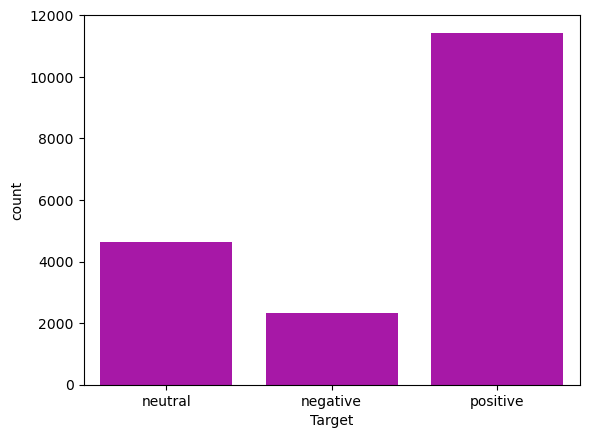

In [73]:
import seaborn as sns
sns.countplot(x='Target',data=a,color='m')

In [77]:
b['Target'].replace('positive',1,inplace=True)
b['Target'].replace('neutral',0,inplace=True)
b['Target'].replace('negative',-1,inplace=True)
b['Target']=b['Target'].astype(int)
b

C:\Users\laswi\AppData\Local\Temp\ipykernel_2360\2802379561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  b['Target'].replace('positive',1,inplace=True)
C:\Users\laswi\AppData\Local\Temp\ipykernel_2360\2802379561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,Comment,Target
0,lets not forget that apple pay in 2014 require...,0
1,here in nz 50 of retailers don’t even have con...,-1
2,i will forever acknowledge this channel with t...,1
3,whenever i go to a place that doesn’t take app...,-1
4,apple pay is so convenient secure and easy to ...,1
...,...,...
18403,i really like the point about engineering tool...,1
18404,i’ve just started exploring this field and thi...,1
18405,excelente video con una pregunta filosófica pr...,0
18406,hey daniel just discovered your channel a coup...,1


In [79]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17874 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  17874 non-null  object
 1   Target   17874 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 349.1+ KB


In [96]:
b = b.dropna().reset_index(drop=True)
b

,Comment,Target
0,lets not forget that apple pay in 2014 require...,0
1,here in nz 50 of retailers don’t even have con...,-1
2,i will forever acknowledge this channel with t...,1
3,whenever i go to a place that doesn’t take app...,-1
4,apple pay is so convenient secure and easy to ...,1
...,...,...
17869,i really like the point about engineering tool...,1
17870,i’ve just started exploring this field and thi...,1
17871,excelente video con una pregunta filosófica pr...,0
17872,hey daniel just discovered your channel a coup...,1


In [98]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0, len(b)):
    review=re.sub('[^a-zA-Z]',' ',b['Comment'][i])
    review=review.lower()
    review=nltk.word_tokenize(review)
    review= [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review= ' '.join(review)
    corpus.append(review)

In [100]:
corpus

['let forget appl pay requir brand new iphon order use signific portion appl user base wasnt abl use even want success iphon incorpor technolog older iphon replac number peopl could use technolog increas',
 'nz retail even contactless credit card machin like paywav support appl pay like high fee come',
 'forev acknowledg channel help lesson idea explan quit help youll sit comfort monitor account growth',
 'whenev go place take appl pay happen often drag contactless covid habit get appl card gotten use appl pay get serious annoy store take feel like shock crazi quickli took shop routin offici brainwash appl feel inconveni even carri physic card pocket',
 'appl pay conveni secur easi use use korean japanes airport need physic credit card',
 'hound bank adopt appl pay understand want extra fee easi quick checkout',
 'got appl pay south africa wide accept',
 'need appl pay physic credit card',
 'unit state abund retail accept appl pay still good carri physic card still larg quantiti place 

In [102]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\laswi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()
y=b.Target

In [106]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)
from sklearn.naive_bayes import MultinomialNB
spam_detect_model1=MultinomialNB().fit(xtrain,ytrain)

In [110]:
y_pred=spam_detect_model1.predict(xtest)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [134]:
y_pred=spam_detect_model1.predict(xtest)
cm=confusion_matrix(ytest,y_pred)

In [136]:
cm

array([[ 255,   53,  171],
       [ 163,  289,  456],
       [ 107,  125, 1956]], dtype=int64)

In [138]:
spam_detect_model1.score(xtest,ytest)

0.6993006993006993

In [140]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laswi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laswi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laswi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\laswi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [171]:
cmt=b.Comment
cmt

0        lets not forget that apple pay in 2014 require...
1        here in nz 50 of retailers don’t even have con...
2        i will forever acknowledge this channel with t...
3        whenever i go to a place that doesn’t take app...
4        apple pay is so convenient secure and easy to ...
                               ...                        
18403    i really like the point about engineering tool...
18404    i’ve just started exploring this field and thi...
18405    excelente video con una pregunta filosófica pr...
18406    hey daniel just discovered your channel a coup...
18407    this is great focus is key a playful approach ...
Name: Comment, Length: 17874, dtype: object

#  TOKENIZATION

In [173]:
from nltk import TweetTokenizer
tz = TweetTokenizer()
cmt = cmt.apply(lambda x: tz.tokenize(x)).apply(lambda x: ' '.join(x))
cmt

0        lets not forget that apple pay in 2014 require...
1        here in nz 50 of retailers don ’ t even have c...
2        i will forever acknowledge this channel with t...
3        whenever i go to a place that doesn ’ t take a...
4        apple pay is so convenient secure and easy to ...
                               ...                        
18403    i really like the point about engineering tool...
18404    i ’ ve just started exploring this field and t...
18405    excelente video con una pregunta filosófica pr...
18406    hey daniel just discovered your channel a coup...
18407    this is great focus is key a playful approach ...
Name: Comment, Length: 17874, dtype: object

#  REMOVE SPECIAL CHARACTERS

In [201]:
La=cmt.str.replace('[^a-zA=Z0-9]+',' ')
La

0        lets not forget that apple pay in 2014 require...
1        here in nz 50 of retailers don ’ t even have c...
2        i will forever acknowledge this channel with t...
3        whenever i go to a place that doesn ’ t take a...
4        apple pay is so convenient secure and easy to ...
                               ...                        
18403    i really like the point about engineering tool...
18404    i ’ ve just started exploring this field and t...
18405    excelente video con una pregunta filosófica pr...
18406    hey daniel just discovered your channel a coup...
18407    this is great focus is key a playful approach ...
Name: Comment, Length: 17874, dtype: object

In [203]:
from nltk.tokenize import word_tokenize
La2=La.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) >=3]))
La2

0        lets not forget that apple pay 2014 required b...
1        here retailers don even have contactless credi...
2        will forever acknowledge this channel with the...
3        whenever place that doesn take apple pay doesn...
4        apple pay convenient secure and easy use used ...
                               ...                        
18403    really like the point about engineering toolbo...
18404    just started exploring this field and this was...
18405    excelente video con una pregunta filosófica pr...
18406    hey daniel just discovered your channel couple...
18407    this great focus key playful approach can also...
Name: Comment, Length: 17874, dtype: object

#  STEMMING

In [205]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
Laa=La2.apply(lambda x:[stemmer.stem(i.lower())for i in tweetzer.tokenize(x)]).apply(lambda x: ' '.join(x))
Laa

0        let not forget that appl pay 2014 requir brand...
1        here retail don even have contactless credit c...
2        will forev acknowledg this channel with the he...
3        whenev place that doesn take appl pay doesn ha...
4        appl pay conveni secur and easi use use while ...
                               ...                        
18403    realli like the point about engin toolbox thin...
18404    just start explor this field and this was real...
18405    excelent video con una pregunta filosófica pro...
18406    hey daniel just discov your channel coupl day ...
18407    this great focus key play approach can also sp...
Name: Comment, Length: 17874, dtype: object

#  STOPWORDS REMOVING

In [207]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
Laa=Laa.apply(lambda x:[i for i in tweetzer.tokenize(x) if i not in sw]).apply(lambda x: ' '.join(x))
Laa

0        let forget appl pay 2014 requir brand new ipho...
1        retail even contactless credit card machin lik...
2        forev acknowledg channel help lesson idea expl...
3        whenev place take appl pay happen often drag c...
4        appl pay conveni secur easi use use korean jap...
                               ...                        
18403    realli like point engin toolbox think lot burn...
18404    start explor field realli good remind get earl...
18405    excelent video con una pregunta filosófica pro...
18406    hey daniel discov channel coupl day ago learn ...
18407    great focus key play approach also speed thing...
Name: Comment, Length: 17874, dtype: object

#  VECTORIZATION - TF - IDF

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
tr=TfidfVectorizer()
ft=tr.fit_transform(Llama_rag2)
ft.shape

(17874, 30119)

In [211]:
ft

<17874x30119 sparse matrix of type '<class 'numpy.float64'>'
	with 280961 stored elements in Compressed Sparse Row format>

In [193]:
y=b['Target'].values
y

array(['neutral', 'negative', 'positive', ..., 'neutral', 'positive',
       'positive'], dtype=object)

In [213]:
train_x,test_x,train_y,test_y=train_test_split(ft,y,test_size=0.3,random_state=42)
train_x

<12511x30119 sparse matrix of type '<class 'numpy.float64'>'
	with 196257 stored elements in Compressed Sparse Row format>

#  K-NEIGHBORS

In [216]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x,train_y)
r3=knn.predict(test_x)
r3

array(['neutral', 'neutral', 'neutral', ..., 'positive', 'positive',
       'neutral'], dtype=object)

#  NAIVE_BAYES

In [219]:
from sklearn.naive_bayes import BernoulliNB
ha=BernoulliNB()
ha.fit(train_x,train_y)
r4=ha.predict(test_x)
r4

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

#  SVC

In [222]:
from sklearn.svm import SVC
sc=SVC()
sc.fit(train_x,train_y)
r5=sc.predict(test_x)
r5

array(['neutral', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

#  ACCURACY SCORE

In [225]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Score is:',accuracy_score(test_y,r3))

Score is: 0.5463360059668096


In [227]:
print('Score is:',accuracy_score(test_y,r4))

Score is: 0.6610106283796383


In [229]:
print('Score is:',accuracy_score(test_y,r5))

Score is: 0.7451053514823792


#  CLASSIFICATION REPORT - PRECISION, RECALL, F1 SCORE

#  KNEIGHBORS

In [233]:
from sklearn.metrics import classification_report
print(classification_report(test_y,r3))

              precision    recall  f1-score   support

    negative       0.68      0.03      0.06       675
     neutral       0.35      0.81      0.49      1366
    positive       0.83      0.54      0.66      3322

    accuracy                           0.55      5363
   macro avg       0.62      0.46      0.40      5363
weighted avg       0.69      0.55      0.54      5363



#  NAIVE BAYES

In [236]:
print(classification_report(test_y,r4))

              precision    recall  f1-score   support

    negative       0.41      0.16      0.23       675
     neutral       0.74      0.18      0.29      1366
    positive       0.67      0.96      0.79      3322

    accuracy                           0.66      5363
   macro avg       0.61      0.43      0.44      5363
weighted avg       0.66      0.66      0.59      5363



In [238]:
print(classification_report(test_y,r5))

              precision    recall  f1-score   support

    negative       0.70      0.23      0.34       675
     neutral       0.62      0.59      0.60      1366
    positive       0.79      0.92      0.85      3322

    accuracy                           0.75      5363
   macro avg       0.70      0.58      0.60      5363
weighted avg       0.74      0.75      0.72      5363

